In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
import random
import os
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=200, facecolor='white')

scanpy==1.9.0.dev81+ga8bd4cf3 anndata==0.8.0 umap==0.5.2 numpy==1.21.6 scipy==1.7.3 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.6


In [3]:
cluster=['18','21']

In [4]:
for j in  cluster:
    data = pd.read_csv('./result/CD4-CXCL13_'+j+'.csv')
    # 高斯滤波
    data_filter = ndimage.gaussian_filter(data['log2FC'],sigma=10)
    
    data_filter = pd.DataFrame(data_filter)
    data_filter.rename(columns={0:'number'},inplace=True)
    
    # 二阶差分
    diff2 = pd.DataFrame(np.diff(data_filter.number,n=2))
    diff2.rename(columns={0:'diff2'},inplace=True)
    
    # 高斯滤波
    final = ndimage.gaussian_filter(diff2.diff2, sigma=10)
    final = pd.DataFrame(final)
    final.rename(columns={0:'number'}, inplace=True)
    
    # signature挑选
    count = 0
    for i in final.index:
        if final.number[i] * final.number[i+1] < 0:
            count += 1
            if count == 2:
                i += 2
                break
    data.head(i)[data.expression=='Up-regulated'].to_csv('./result/CD4-CXCL13_'+j+'_signature.csv',index=False)


/var/folders/3f/l01mb30n3815clzkmj3ygt7w0000gn/T/ipykernel_40153/811584994.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.head(i)[data.expression=='Up-regulated'].to_csv('./result/CD4-CXCL13_'+j+'_signature.csv',index=False)
/var/folders/3f/l01mb30n3815clzkmj3ygt7w0000gn/T/ipykernel_40153/811584994.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.head(i)[data.expression=='Up-regulated'].to_csv('./result/CD4-CXCL13_'+j+'_signature.csv',index=False)


In [6]:
data = pd.read_csv('./result/CD4-CXCL13_18.csv')

In [7]:
data

,gene,log2FC,pVal,adj.p,-Log10(adj.P),expression
0,BGN,2.055317,7.073442e-06,0.000146,3.836344,Up-regulated
1,SLC27A2,2.008854,5.189881e-08,0.000002,5.696212,Up-regulated
2,HPGD,1.628798,3.168383e-02,0.148620,0.827923,NS.
3,LFNG,1.563659,2.010428e-06,0.000048,4.317091,Up-regulated
4,POMT2,1.510998,3.445400e-03,0.026107,1.583245,Up-regulated
...,...,...,...,...,...,...
2171,POLA1,-1.707861,9.260174e-02,0.310458,0.507996,NS.
2172,MAN2A2,-1.721106,8.821977e-02,0.300676,0.521901,NS.
2173,EXOSC2,-2.126571,3.425090e-02,0.157340,0.803161,NS.
2174,ZDHHC21,-2.257907,1.498019e-03,0.013427,1.872009,Down-regulated


In [8]:
data_filter = ndimage.gaussian_filter(data['log2FC'],sigma=10)

In [9]:
data_filter = pd.DataFrame(data_filter)
data_filter.rename(columns={0:'number'},inplace=True)

In [10]:
fig = plt.figure(figsize = (10,8))

<Figure size 2000x1600 with 0 Axes>

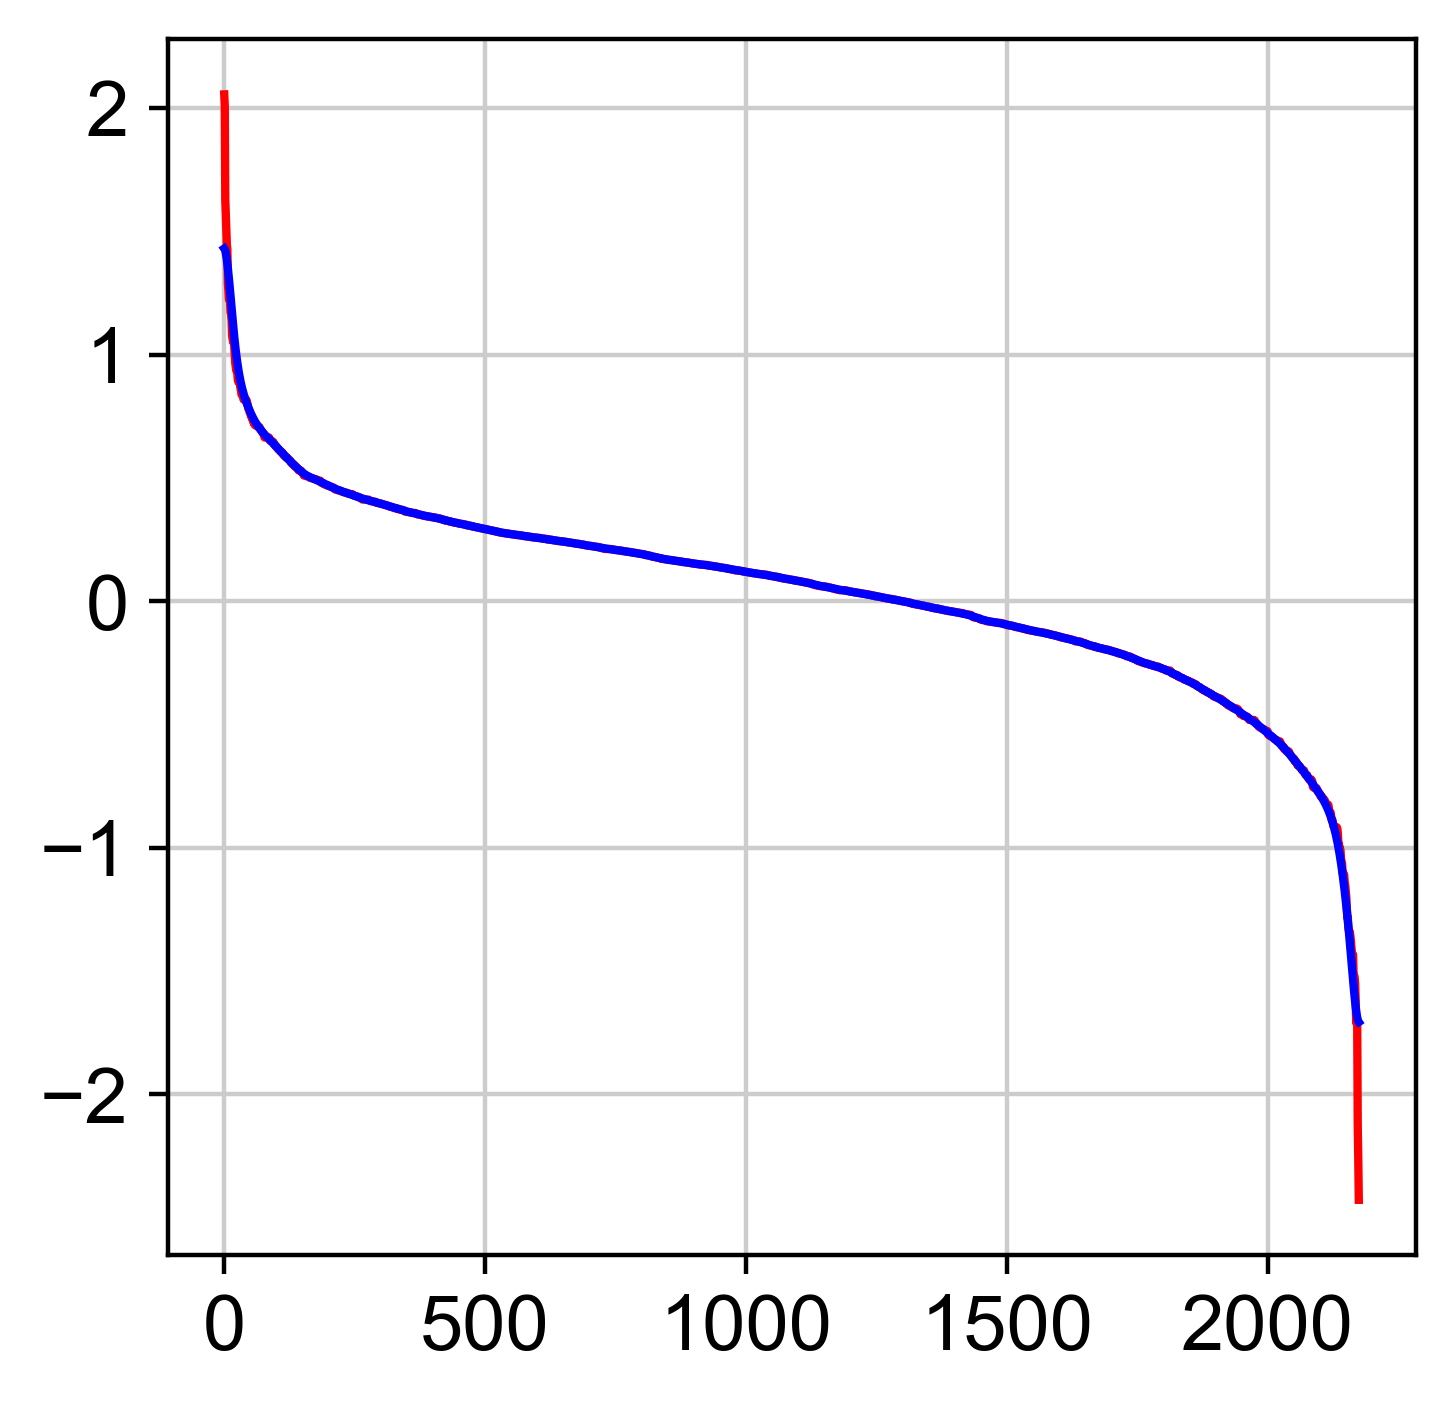

In [11]:
plt.plot(data.index, # x轴数据
         data.log2FC, # y轴数据
         #linestyle = '-', # 折线类型
         #linewidth = 0.5, # 折线宽度
         color = 'red', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 0, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色

plt.plot(data_filter.index, # x轴数据
         data_filter.number, # y轴数据
         #linestyle = '-', # 折线类型
         #linewidth = 0.5, # 折线宽度
         color = 'blue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 0, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色


In [12]:
diff2 = pd.DataFrame(np.diff(data_filter.number,n=2))

In [13]:
diff2.rename(columns={0:'diff2'},inplace=True)

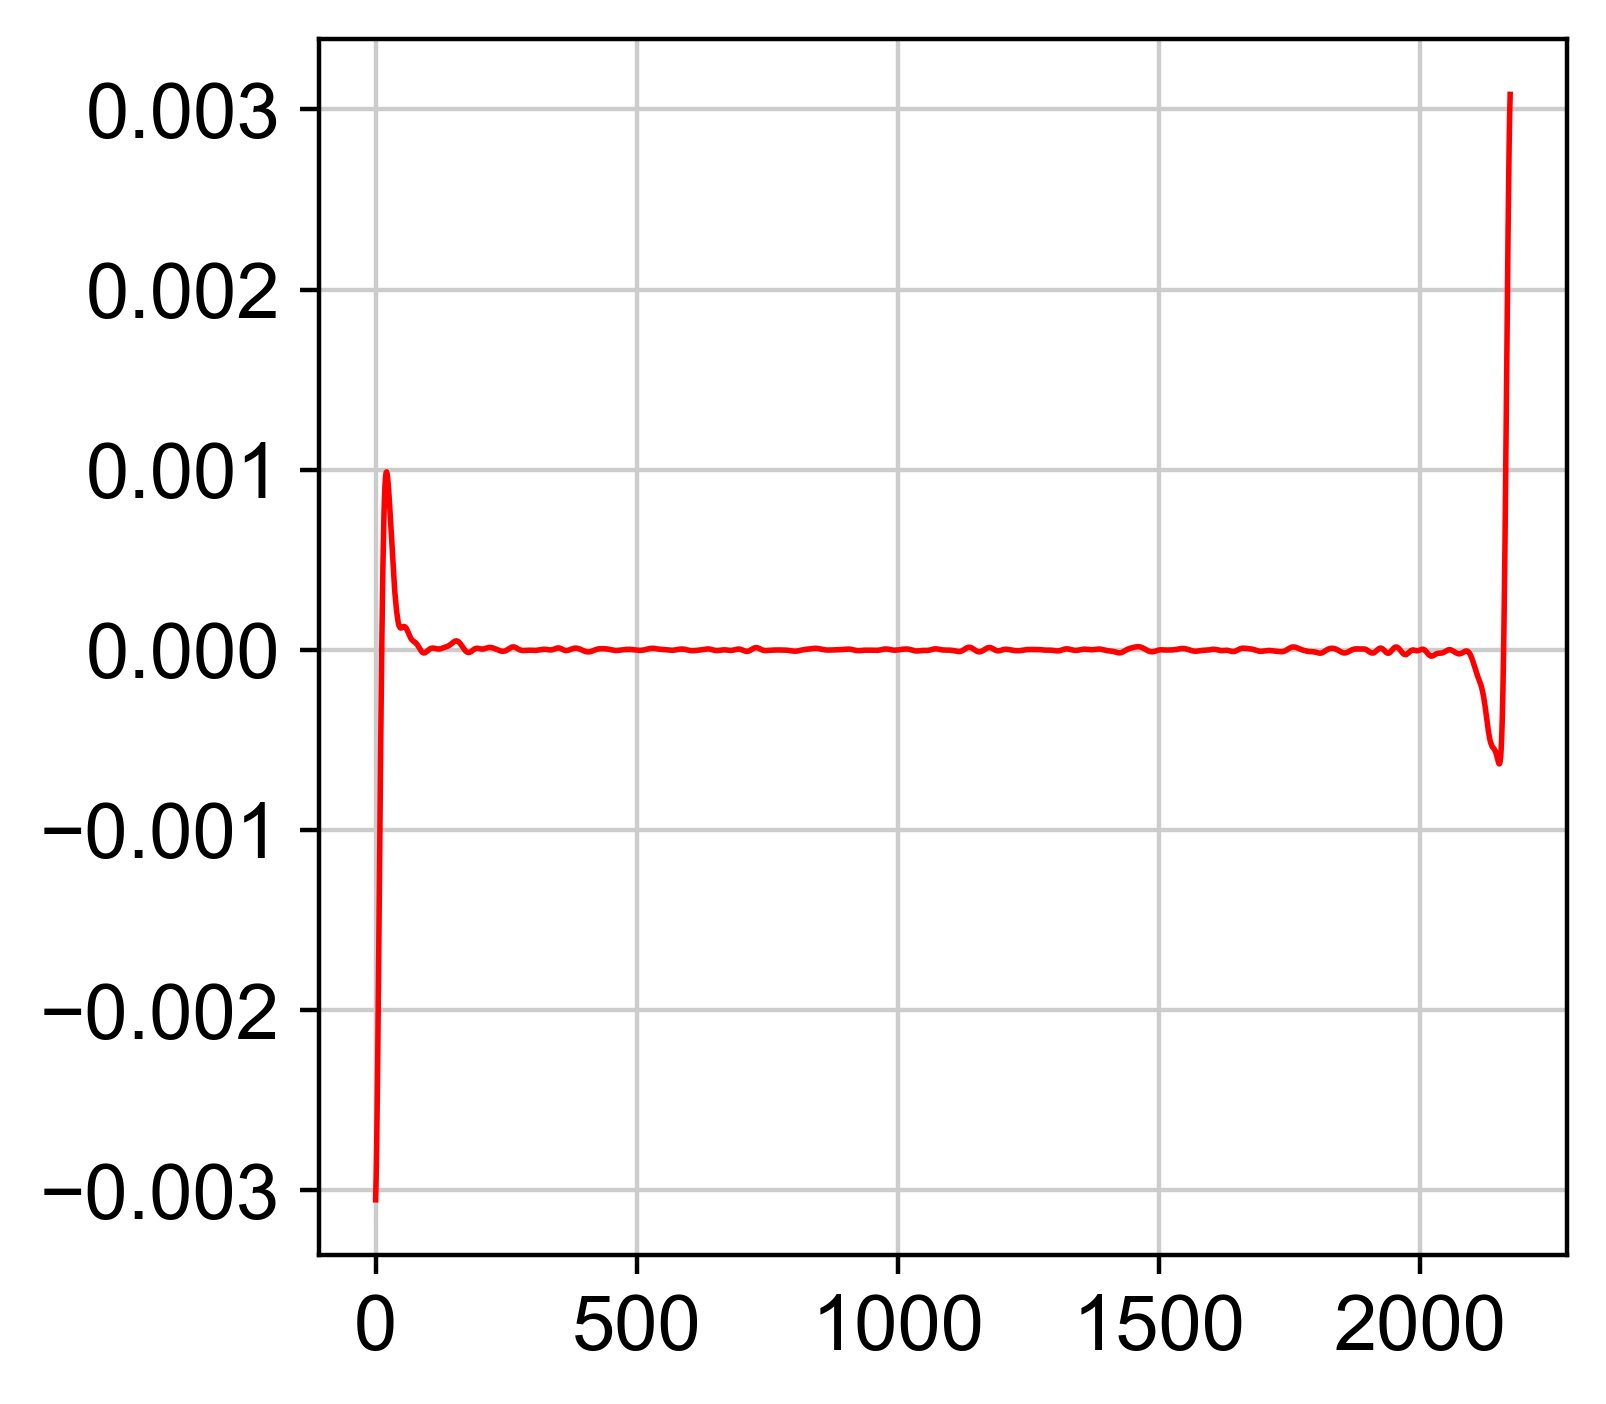

In [14]:
plt.plot(diff2.index, # x轴数据
         diff2.diff2, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 1, # 折线宽度
         color = 'red', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 0, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色

In [15]:
final = ndimage.gaussian_filter(diff2.diff2, sigma=10)
final = pd.DataFrame(final)
final.rename(columns={0:'number'}, inplace=True)

In [16]:
count = 0
for i in final.index:
    if final.number[i] * final.number[i+1] < 0:
        count += 1
        if count == 2:
            i += 2
            break



In [20]:
final.head(90)

,number
0,-0.001365
1,-0.001350
2,-0.001320
3,-0.001275
4,-0.001217
...,...
85,0.000013
86,0.000011
87,0.000009
88,0.000007


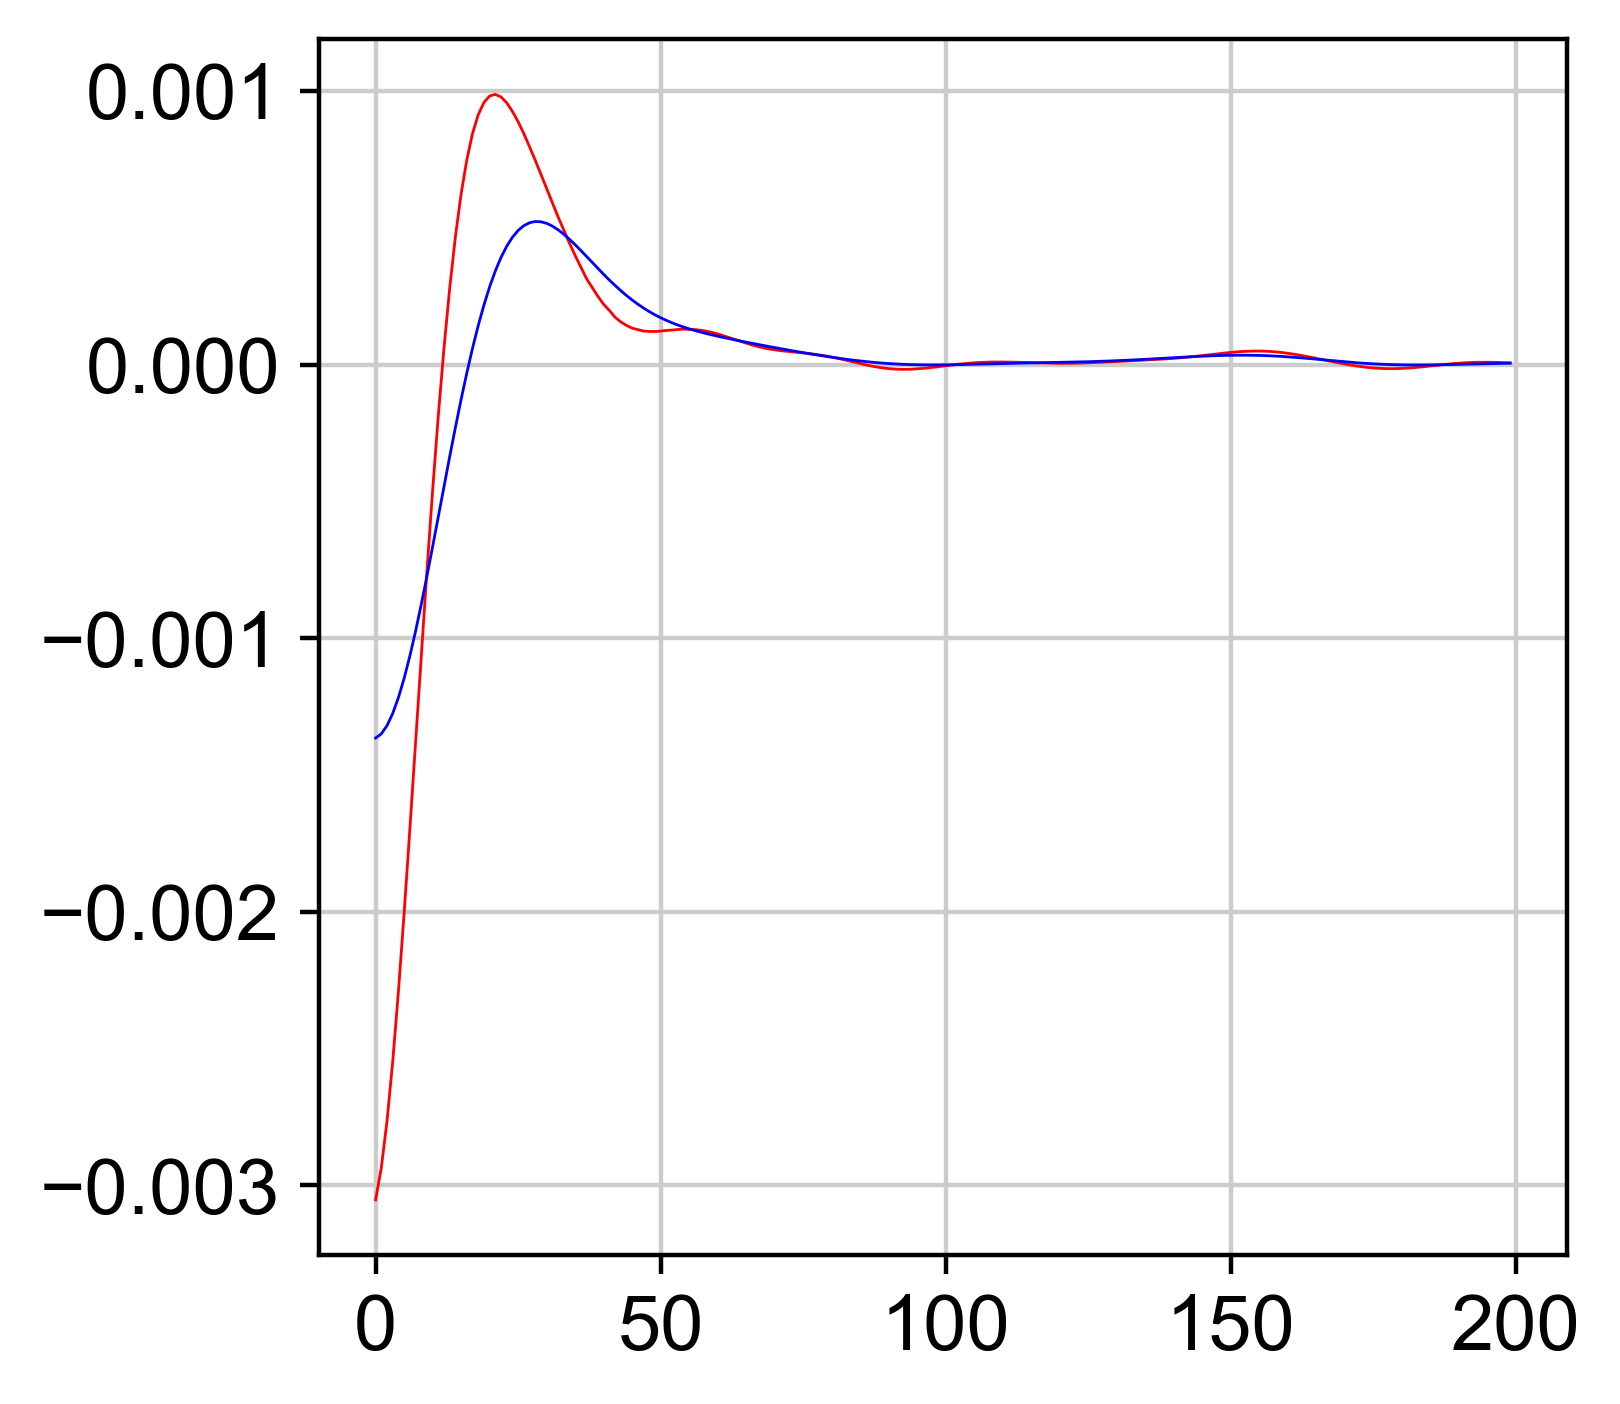

In [19]:

plt.plot(diff2.head(200).index, # x轴数据
         diff2.head(200).diff2, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 0.5, # 折线宽度
         color = 'red', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 0, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色

plt.plot(final.head(200).index, # x轴数据
         final.head(200).number, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 0.5, # 折线宽度
         color = 'blue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 0, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色



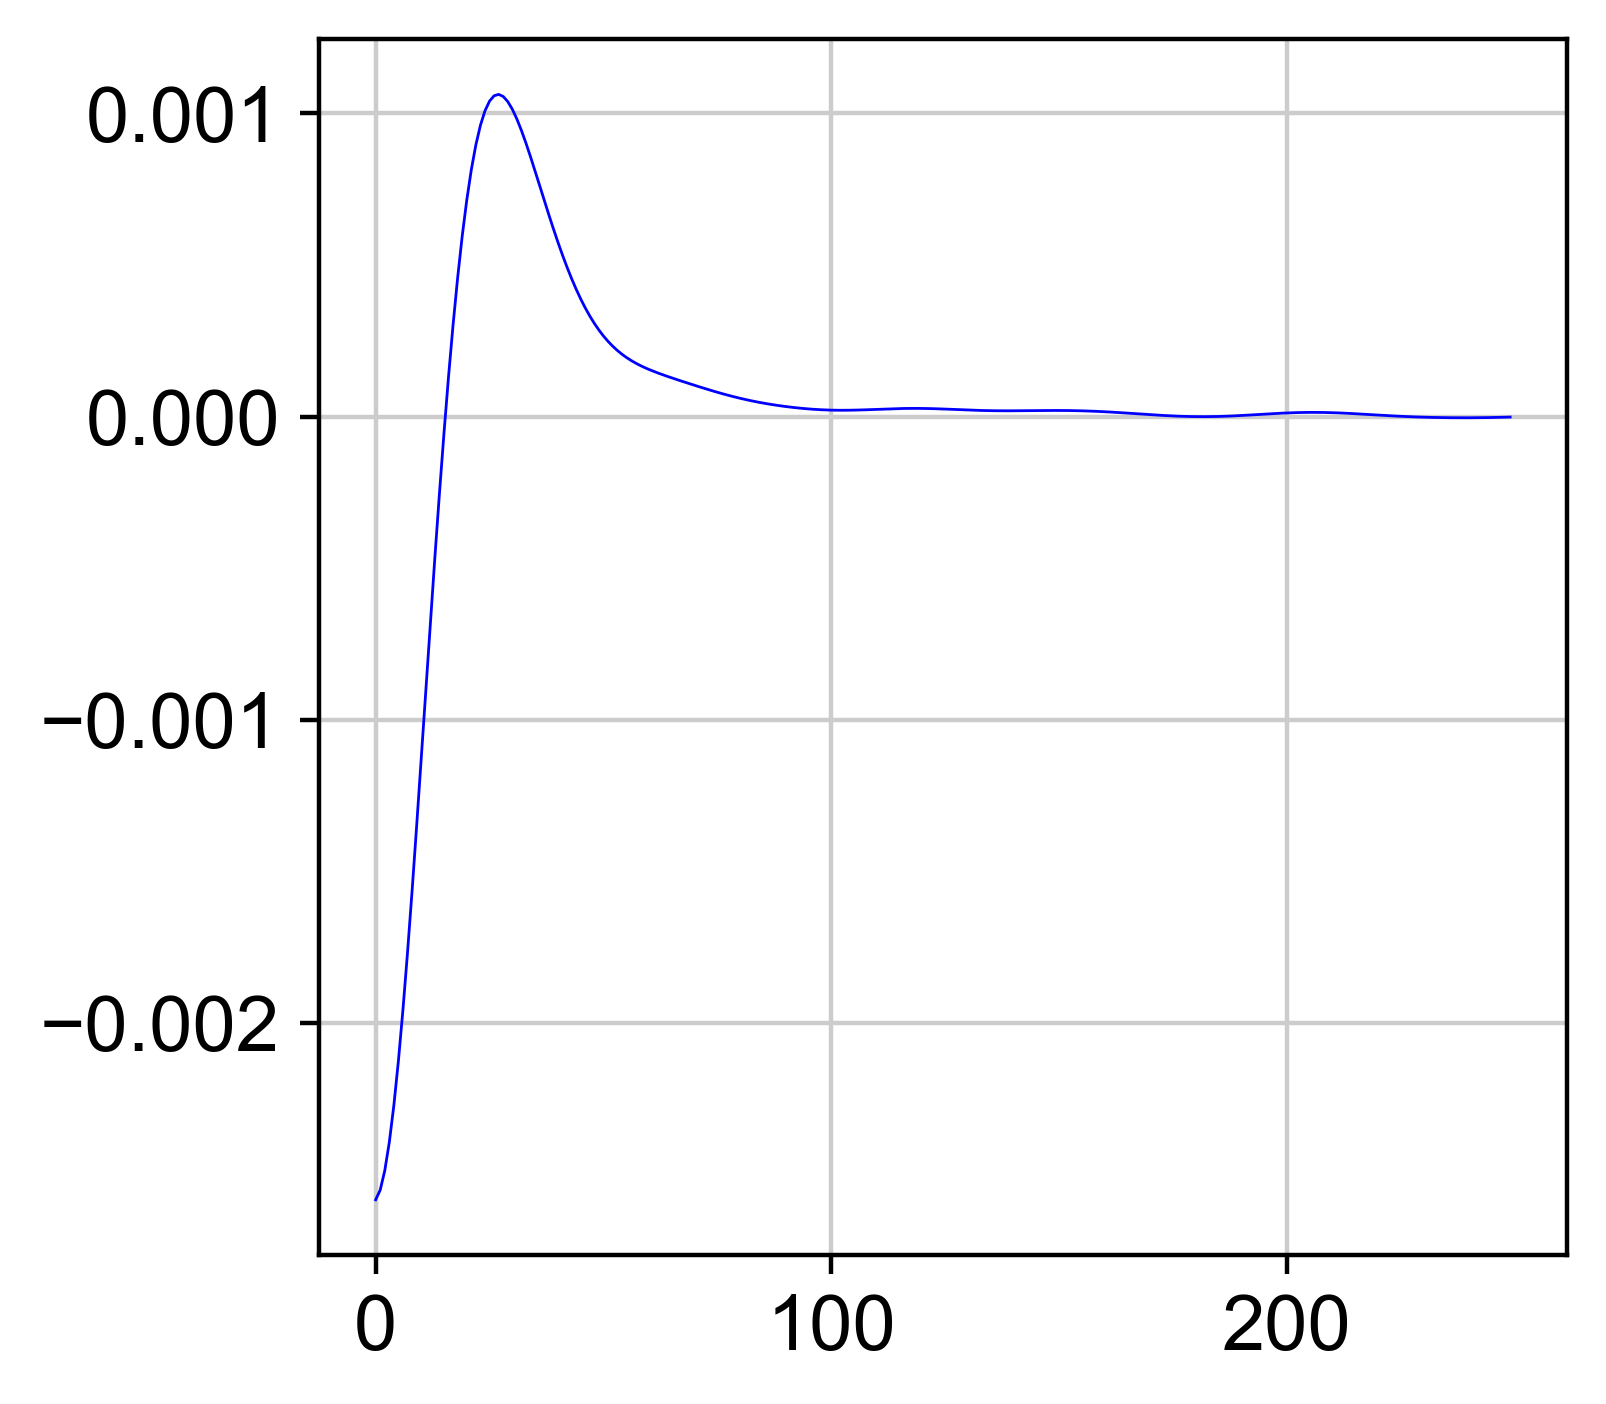

In [29]:
plt.plot(final.head(250).index, # x轴数据
         final.head(250).number, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 0.5, # 折线宽度
         color = 'blue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 0, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色


In [131]:
max(final['number'])

0.00478614253763874

In [132]:
min(final['number'])

-0.006506681319612835

In [133]:
diff1 = pd.DataFrame(np.diff(data_filter.number,n=1))
diff1.rename(columns={0:'diff1'},inplace=True)

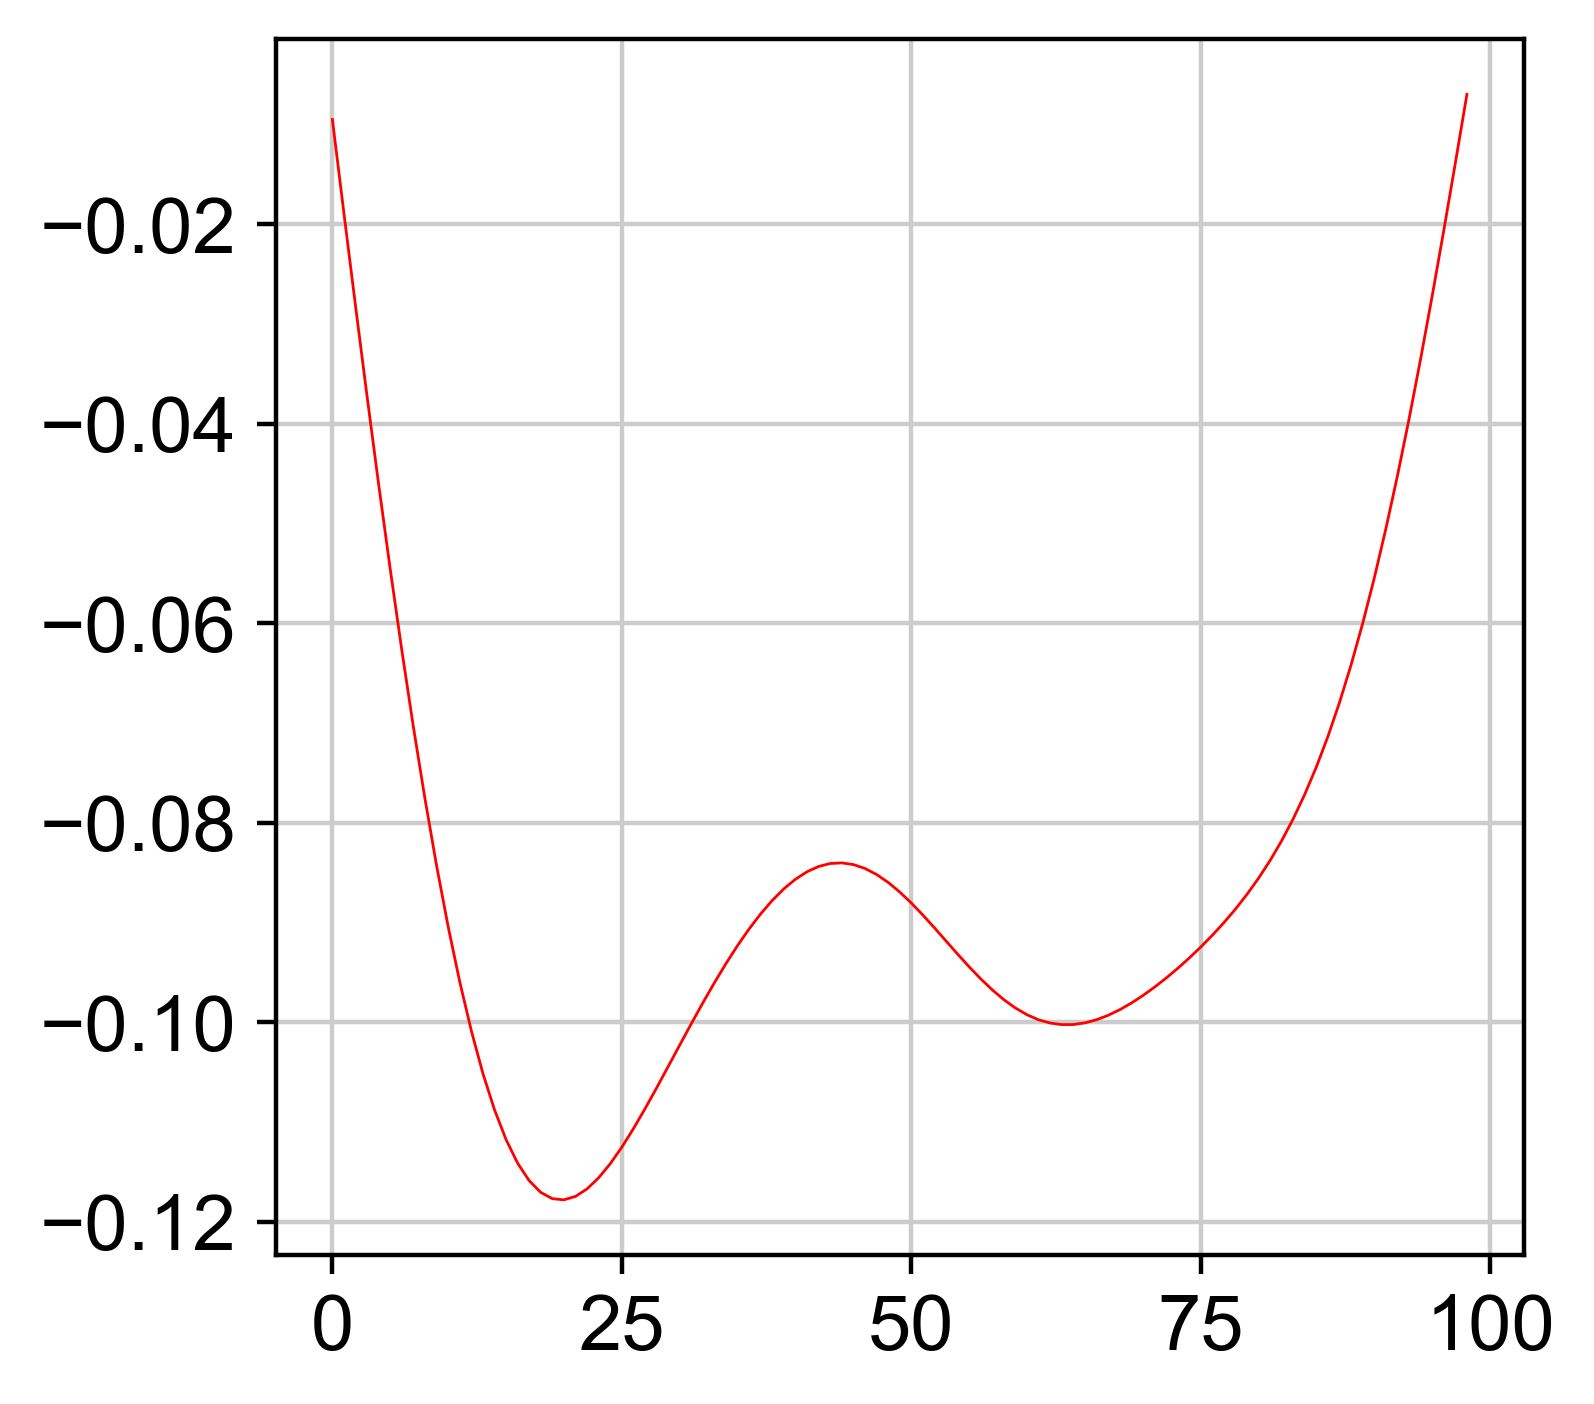

In [134]:

plt.plot(diff1.index, # x轴数据
         diff1.diff1, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 0.5, # 折线宽度
         color = 'red', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 0, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色